# Auto-mobile MPG prediction model

## 1. Problem Description

The basic idea of analysing the Auto mpg dataset is to get a fair idea about the factors affecting the aggregate fuel consumption of each car.

Cars of different variants of different models of various Car manufacturing companies from origin countries such as USA, Japan and Europe.

Fuel consumption of car is affected by various factors such as Model year, Horsepower, Number of Cylinders present, displacement, Weight and Acceleration of the car.

We need to find which factors mostly affect the Fuel consumption of a car in order to improve the mpg value.

Hence build a model to predict the mpg value of each car.

### Features on data set

**cylinders**: contains the number of cylinders present in the car

**displacement**: contains the Displacement of the car

**horsepower**: contains the Horsepower of the car

**weight**: contains the weight of the car

**acceleration**: contains the Acceleration of the car

**model_year**: contains the model year of the car

**origin**: contains the origin country which car belong to

**car_name**: contains the name of the car(Brand-Model-Variant)
### Target Variable

**mpg**: contains the fuel consumption value(in Miles per Gallon) for car
### Model description

- Numpy, Pandas, Matplotlib, Seaborn libraries have been used for Data Cleaning, Exploratory Data Analysis, and Data Visualization.

- Categorical Features are encoded using OneHotEncoder and LabelEncoder.

- Feature Scaling, and Feature Selection Techniques have been performed.

- Linear Regression, Support Vector Regressor, Random forest Regressor, Gradient boosting Regressor model have been used to predict the mpg values.

- **Accuracy score: 91%** using **Random Forest Regressor**.


## 2. Data cleaning and Manipulation

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

The following dataset does not have column names provided to us. We need to provide the column names to it.

In [88]:
df = pd.read_csv("./auto-mpg.csv")
print(df.shape)
print(df.dtypes)

(398, 9)
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


all columns looks fine execpt the horsepower has the data type of object(string)

In [62]:
df['horsepower'].isnull().sum()

np.int64(0)

so horsepower does not have any missing values or null values. We would however like to check what all horsepower assumes!

In [63]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

We discovered that the missing values in the horsepower column are represented by the symbol `'?'`. This is causing pandas to interpret the column as an object datatype instead of a numeric one, which can complicate analysis.


### Approaches to Handle Missing Values

There are several ways to handle missing values in a dataset, especially when they are represented by symbols or non-numeric values.
1. ### Drop Missing Values:
  - **When to Use**: This method works well if the missing values represent a small portion of the dataset and can be safely discarded.
  - **Example**:
  ```python
  df = df.dropna()  # Drops rows with any missing values
  ```
2. ### Imputation with Statistical Values:
  - **Mean Imputation**: Replace missing values with the mean. Suitable when the data is roughly normally distributed.
  ```python
  df['column'].fillna(df['column'].mean(), inplace=True)
  ```
  - **Median Imputation**: Replace missing values with the median. Preferred when the data has outliers, as the median is less affected by extreme values.
  ```python
  df['column'].fillna(df['column'].median(), inplace=True)
  ```

In this dataset, we'll use median imputation to fill in missing values for horsepower, as it is resistant to outliers and provides a more robust estimate than the mean.

italicized text# Implementation
1. **Replace `'?'` with `NaN`**:
First, we'll replace the `'?'` symbol in the dataset with `NaN` so pandas can recognize it as a missing value.
2. **Convert Columns to Numeric Types**: This allows pandas to treat columns as numeric, handling `NaN` properly.
3. **Fill Missing Values with the Median**: For each numeric column with missing values, we'll use median imputation.

In [64]:
# Step 1: Replace '?' with NaN
df['horsepower'] = df['horsepower'].replace('?', np.nan)

# Step 2: Convert horsepower to numeric, with errors='coerce' to handle NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Step 3: Fill missing values in horsepower with the median
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Verify that there are no remaining missing values in horsepower
print(df['horsepower'].isnull().sum())

0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


the `car name` is object value and we don't need this because it does't help the model, we gonna drop this column

In [66]:
df = df.drop(["car name"], axis=1)

The `origin` column in the Auto MPG dataset typically contains integer values representing the geographical origin of the vehicles:

- 1: USA
- 2: Europe
- 3: Asia

let's encode the origin column with **One-Hot Encoding**


In [67]:
df_encoded = pd.get_dummies(df, columns=["origin"], prefix="origin")
# dummy_columns = [col for col in df_encoded.columns if col.startswith("origin_")]
# df_encoded[dummy_columns] = df_encoded[dummy_columns].astype(int)
df = df_encoded
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,True,False,False



None of the other columns have a null value, let us look at some of the basic statistics of each numeric column in the dataframe

## 3. Exploratory Analysis

The goal of our problem is to successfully predict mpg. Let us look at the mpg column in more detail.

In [68]:
df["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

the value of the mpg is between [9, 46.6] with a mean of 23.51 and varies by 7.8 the median 23 is quite close to the mean.

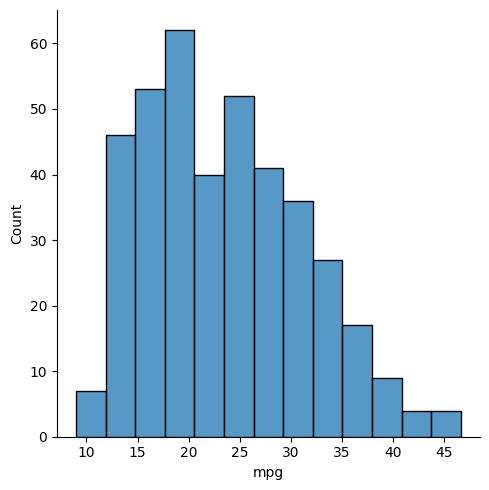

In [69]:
sns.displot(df['mpg'])


Let us take a look at how mpg changes with respect to year i.e. have cars become more efficient over the years?

<Axes: xlabel='model year', ylabel='mpg'>

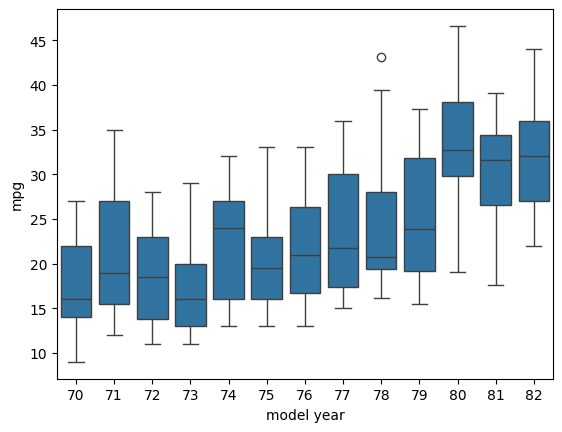

In [70]:
sns.boxplot(x='model year', y='mpg', data=df)


We notice that cars have indeed become more efficient as time has passed. A reasonable assumption since technology advanced and made manufacturing of more efficient engines possible.

In the 80s, the median mpg is more than the 75 percentile of all previous years vehicles.


We can also explore how mpg and acceleration varies with the number of cylinders.

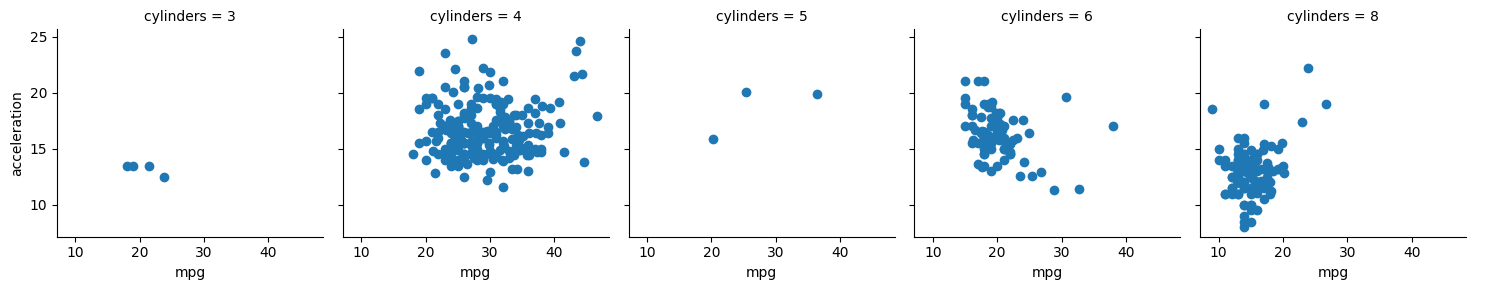

In [71]:
g = sns.FacetGrid(data=df, col='cylinders')
g.map(plt.scatter, 'mpg','acceleration').add_legend()

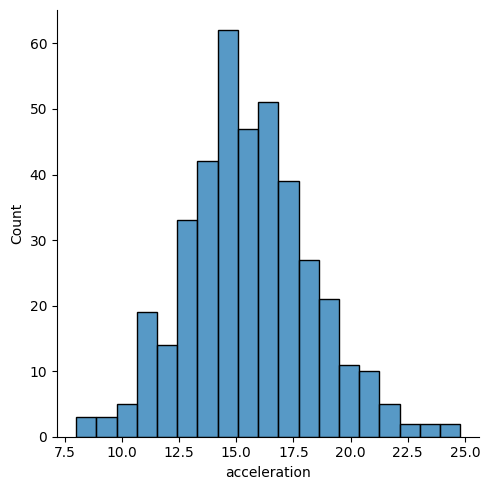

In [72]:
sns.displot(df['acceleration'])


The distribution of acceleration follows the normal distribution.

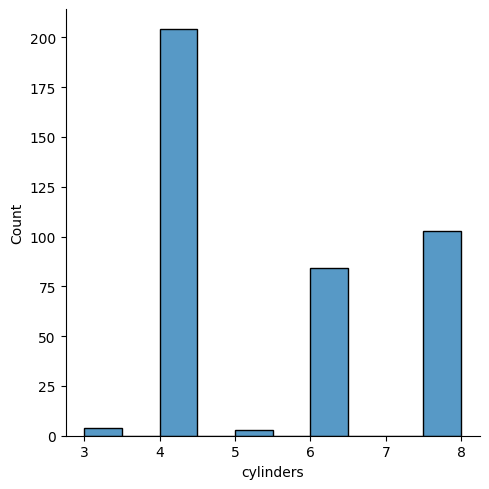

In [73]:
sns.displot(df['cylinders'])


We notice that the distribution for cylinders is very discrete! Most cars either have 4 cylinders followed by 8 and then 6.

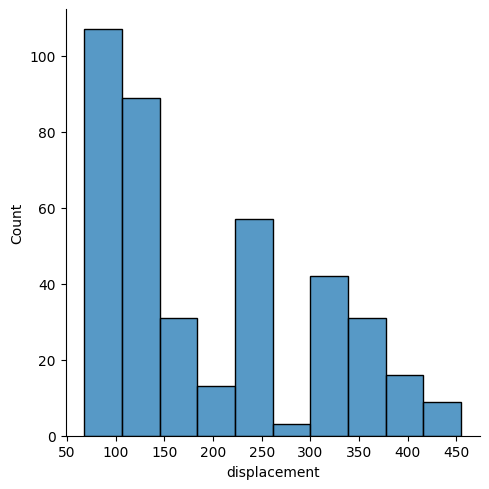

In [74]:
# df["displacement"].describe()
sns.displot(df['displacement'])

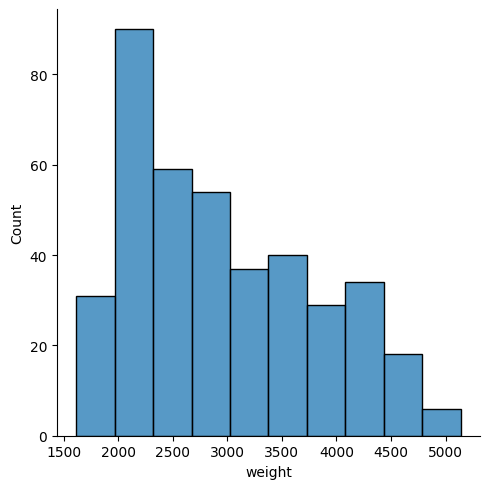

In [75]:
sns.displot(df['weight'])


The distribution for weight is also right skewed.

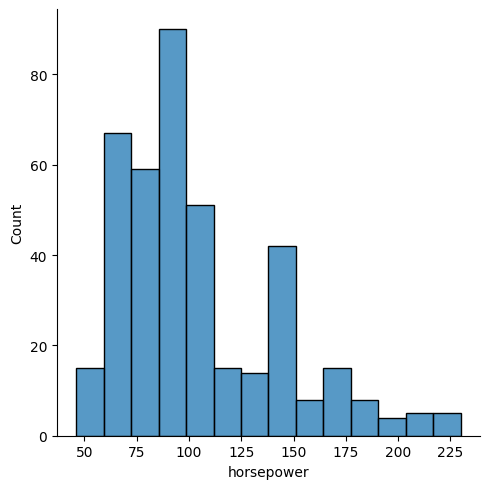

In [76]:
sns.displot(df['horsepower'])


The distribution for horsepower is also right skewed.


Let us look at how the variables are correlated with mpg. This can give us a rough idea on how mpg varies with each of the given variables.

In [77]:
col_names = df.columns.tolist()
clist = col_names[1:10]
print("variables:", clist)
cdict = {}

for cname in clist:
    cdict[cname] = np.float64(np.corrcoef(df['mpg'], df[cname])[0,1])
print("\n", cdict)

variables: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin_1', 'origin_2', 'origin_3']

 {'cylinders': np.float64(-0.7753962854205542), 'displacement': np.float64(-0.804202824805898), 'horsepower': np.float64(-0.7734532045742156), 'weight': np.float64(-0.8317409332443352), 'acceleration': np.float64(0.42028891210165065), 'model year': np.float64(0.5792671330833096), 'origin_1': np.float64(-0.5681915400721657), 'origin_2': np.float64(0.25902216623858837), 'origin_3': np.float64(0.4421744578500838)}


A visual approach to the same is using the heatmap function from seaborn. It can be done in the following way.

<Axes: >

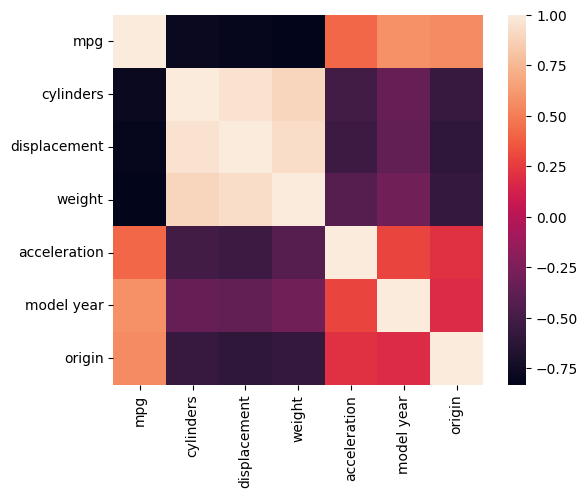

In [91]:
corrmatrix = df.select_dtypes(include='number').corr()
sns.heatmap(corrmatrix, square=True)

## 4. Regression Model and Analysis



So far we have done the necessary data manipulations and exploratory analysis on the data. Now we move to the more exciting part that is creating the regression model. We start with the Multiple Linear Regression Model. But before we fit the model, we need to segment the dataset into training and testing data.


Let's scale our dataset to see what happen?

In [79]:
scaler = StandardScaler()
df_scaled_standard = df.copy()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_scaled_standard[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df_scaled_standard.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,True,False,False
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,True,False,False
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,True,False,False
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,True,False,False
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,True,False,False


In [80]:
from sklearn.metrics import mean_squared_error
features_list_m1 = ['cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model year', 'origin_1', 'origin_2', 'origin_3']
X1 = df[features_list_m1]
y1 = df['mpg']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=24)


In [81]:
regr1 = linear_model.LinearRegression()
regr1.fit(X1_train, y1_train)

LinearRegression()

\
Now that the model is ready, we can use it to predict the values of mpg.

In [82]:
predicted_values_m1 = regr1.predict(X1_test)

In [83]:
residuals = y1_test - predicted_values_m1
print(r2_score(y1_test, predicted_values_m1))

0.7845838120827001


The accuracy of our regression model is 0.78`(before hot encoding was 0.77)`. This is the R-Squared value. However, for multiple regression Adjusted R Square is a much better estimator.

The R Square value suffers from curse of dimensionality. As we keep on adding more independent variables, the accuracy is bound to increase!

how we calculate the R-Squared:
  $$R^2 = 1 - \left(\frac{SS_{\text{residual}}}{SS_{\text{total}}}\right)$$

- $SS\text{residual}$: Residual sum of squares (unexplained variance), calculated as:
  $$SS_{\text{residual}} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$
Where $y_i$ is the actual value, and $\hat{y}_i$ is the predicted value.

- $SS\text{total}$: Total sum of squares (unexplained variance), calculated as:
  $$SS_{\text{total}} = \sum_{i=1}^n (y_i - \bar{y})^2
$$
Where $\bar{y}$ is the actual value.

**Key Idea**:
- $R² = 1$: Perfect fit (the model explains all the variance).
- $R² = 0$: The model explains none of the variance (as good as using the mean).



Thus, we calculate Adjusted R Squared as follows:

  $$
  R^2_{\text{adj}} = 1 - \left[ \frac{(1 - R^2) \cdot (n - 1)}{n - k - 1} \right]
  $$
  - $R^2$: The R-squared value.
  - $n$: Number of observations (data points).
  - $k$: Number of independent variables (features) in the model.

**key Idea**
  - $R^2_{\text{adj}} \leq R^2$: Adjusted R-squared will always be less than or equal to $R²$.
  - It increases only when the added feature improves the model's performance beyond what would be expected by chance.



In [84]:
r_squared = r2_score(y1_test, predicted_values_m1)
adjusted_r = 1 - (1 - r_squared) * (len(y1_test) - 1) / (len(y1_test) - len(regr1.coef_) - 1)

print(adjusted_r)

0.7568874450647616



Our model has an accuracy of 0.7568`(before hot encoding was 0.7869)`. This implies it is able to explain 75.68% of all the observations in the dataset. This is a good result.

In [85]:
m1_rmse = np.sqrt(mean_squared_error(y1_test, predicted_values_m1))
print("RMSE: ",m1_rmse)

RMSE:  3.746691635072215


Thus, the predicted and observed values differ by 3.74


## 5. Random Forests

A better model for predictions is to use Random Forests.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=12)
forest_reg.fit(X1_train, y1_train)

y_pred = forest_reg.predict(X1_test)

print("Testing accuracy: ", forest_reg.score(X1_test, y1_test))

forest_rmse = np.sqrt(mean_squared_error(y_pred, y1_test))
print("RMSE: ",forest_rmse)

Training accuracy:  0.9815550247730495
Testing accuracy:  0.8764804248338554
RMSE:  2.8371132842204267


By using Random Forests, the **accuracy** increases from **78.69%** to **87.64%**. This is a significant improvement on our Multiple Regression Model. Additionally, the **RMSE** also decreases from **3.74** to **2.83**